# De craque a lenda

Depois da análise das temporadas iniciais, o normal seria analisar as temporadas seguintes, né? Sim, e é o que pretendo fazer, mas resolvi fazer algo mais completo e adicionei todos os gols da carreira dele no dataset principal até o dia 08/10/2024. Sim, incluí os gols nas suas recentes jornadas no Inter Miami. Aí surgem dois problemas:

1. A carreira dele não acabou, logo terá que ser atualizado quase que semanalmente, o recorte de tempo que eu mesmo estabeleci acabou. Então é mais trabalho pra mim mesmo 😂
2. As temporadas nos EUA seguem o ano solar, ao contrário da Europa, então em algum momento haveria um descompasso para analisar uma temporada inteira, já que a de 2023 ele disputou apenas a metade. E também uma despadronização no formato da temporada. Para isso então resolvi criar uma nova coluna do dataset original colocando o ano solar que saiu o gol.

In [1]:
#Preparando o ambiente

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#datamessi.csv como um dataframe

df = pd.read_csv('datamessi.csv', encoding='latin1')
print(df.head())

      Season            Competition     Matchday      Date Venue  \
0  2004-2005                 LaLiga           34  05-01/05     H   
1  2005-2006  UEFA Champions League  Group Stage  11-02/05     H   
2  2005-2006                 LaLiga           13  11/27/05     H   
3  2005-2006                 LaLiga           19   1/15/06     H   
4  2005-2006                 LaLiga           20   1/22/06     H   

           Club              Opponent Result Playing_Position Minute At_score  \
0  FC Barcelona     Albacete Balompie   2:00               CF   90+1     2:00   
1  FC Barcelona  Panathinaikos Athens   5:00               RW     34     3:00   
2  FC Barcelona      Racing Santander   4:01               RW     51     2:00   
3  FC Barcelona       Athletic Bilbao   2:01               RW     50     2:01   
4  FC Barcelona      Deportivo Alaves   2:00               CF     82     2:00   

             Type      Goal_assist  
0  Perna esquerda       Ronaldinho  
1  Perna esquerda             

In [19]:
# Extrai os dois últimos dígitos da coluna "Date" e converte para inteiro
df['Ano'] = df['Date'].str[-2:].astype(int)

# Mapeia os dois últimos dígitos para o ano correspondente
def map_year(year_last_two_digits):
    if year_last_two_digits >= 25:
        return 1900 + year_last_two_digits
    else:
        return 2000 + year_last_two_digits

df['Ano'] = df['Ano'].apply(map_year)

print(df.head())


      Season            Competition     Matchday      Date Venue  \
0  2004-2005                 LaLiga           34  05-01/05     H   
1  2005-2006  UEFA Champions League  Group Stage  11-02/05     H   
2  2005-2006                 LaLiga           13  11/27/05     H   
3  2005-2006                 LaLiga           19   1/15/06     H   
4  2005-2006                 LaLiga           20   1/22/06     H   

           Club              Opponent Result Playing_Position Minute At_score  \
0  FC Barcelona     Albacete Balompie   2:00               CF   90+1     2:00   
1  FC Barcelona  Panathinaikos Athens   5:00               RW     34     3:00   
2  FC Barcelona      Racing Santander   4:01               RW     51     2:00   
3  FC Barcelona       Athletic Bilbao   2:01               RW     50     2:01   
4  FC Barcelona      Deportivo Alaves   2:00               CF     82     2:00   

             Type      Goal_assist   Ano  
0  Perna esquerda       Ronaldinho  2005  
1  Perna esquerda 

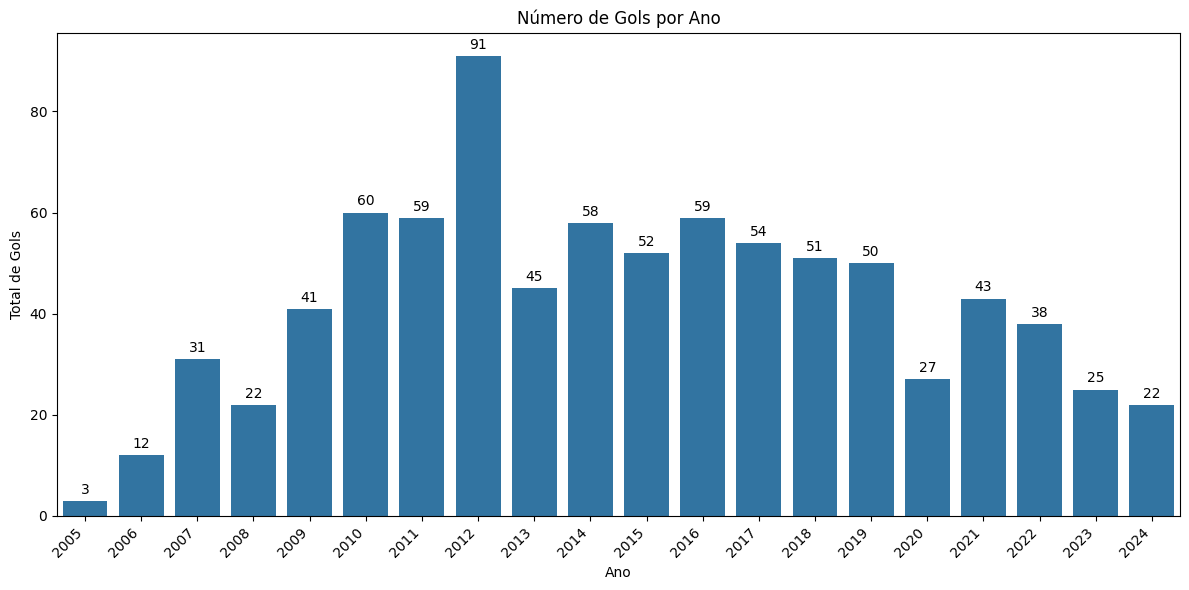

In [23]:
# Agrupando os dados por temporada e contando os gols
gols_por_ano = df.groupby('Ano')['Opponent'].count().reset_index(name='Total_Gols')

# Criando o gráfico de barras clusterizado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Ano', y='Total_Gols', data=gols_por_ano)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Gols')
plt.xlabel('Ano')
plt.title('Número de Gols por Ano')

# Adicionando o número total de gols sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),  # Deslocamento do texto acima da barra
                textcoords='offset points')

plt.tight_layout()
plt.show()

É um assombro o que ele fez e 2012.

Para criar esse gráfico, eu criei uma coluna de "Ano" baseado na coluna de data e refiz o código do número de gols da temporada da primeira parte do projeto. Para não ficar exatamente igual, adicionei o número total de gols de cada temporada sobre as barras.

Resolvi também criar um treemap com a proporção dos gols do Messi pelos clubes que ele marcou. Claro que a maioria esmagadora é pelo Barcelona, mas um treemap ajuda a visualizar essa simetria. Para isso, tive que instalar o squarify.

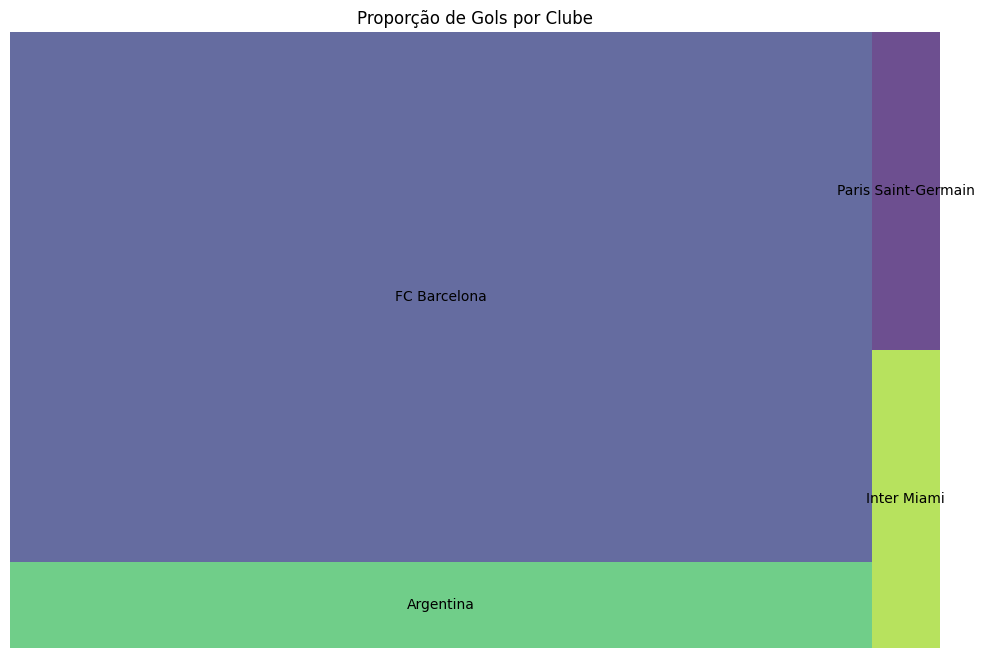

In [27]:
# Instalando e importando o squarify
!pip install squarify
import squarify

# Agrupando os dados por clube e contando os gols
gols_por_clube = df.groupby('Club')['Opponent'].count().reset_index(name='Total_Gols')

# Criando o treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=gols_por_clube['Total_Gols'], label=gols_por_clube['Club'], alpha=.8 )
plt.axis('off')
plt.title('Proporção de Gols por Clube')
plt.show()

## A Era de Ouro

No último insight, vimos que Messi assumiu o protagonismo deixado pela queda de rendimento de Ronaldinho. Mas é em sua 5ª temporada no time principal que ele assume de vez a camisa 10 e o Barcelona promove Pep Guardiola a treinador do time principal. Em sua melhor temporada pré-Guardiola, Messi fez 21 gols. Na pior temporada com Guardiola ele fez 41.

Também ficou estabelecido que ele terminou a temporada anterior como titular absoluto, certo? Mas eu também falei que o número de assistências era irrelevante. Pois bem, não foi só o número de gols que deu um salto, o de assistências também! E o número de jogos idem! As lesões que o atrapalhavam nas temporadas anteriores.

Para exemplificar esse salto, vamos utilizar o mesmo critério do insight anterior: vamos considerar jogos da La Liga e da UEFA Champions League. Só que dessa vez não faremos distinção entre as competições, para isso vamos usar o CSV criado na segunda parte desse projeto. (Lembra que eu falei que criamos e não usamos aquele arquivo pra nada? Pois bem, agora ele será útil)

In [37]:
#extraindo messi_combined_season.csv

df = pd.read_csv('messi_combined_season.csv', encoding='latin1', sep=';')
print(df.head())

      Season      Squad ResultUCL LgRank  MP  Starts   Min  Gls  Ast  G+A  \
0  2004-2005  Barcelona       R16    1st   8       1   160    1    0    1   
1  2005-2006  Barcelona         W    1st  23      15  1233    7    4   11   
2  2006-2007  Barcelona       R16    2nd  31      27  2368   15    3   18   
3  2007-2008  Barcelona        SF    3rd  36      32  2701   16   14   30   
4  2008-2009  Barcelona         W    1st  43      37  3443   32   16   48   

   G-PK  PK  PKatt  CrdY  CrdR  
0     1   0      0     0     0  
1     7   0      0     2     0  
2    15   0      0     3     0  
3    11   5      5     4     0  
4    29   3      4     3     0  


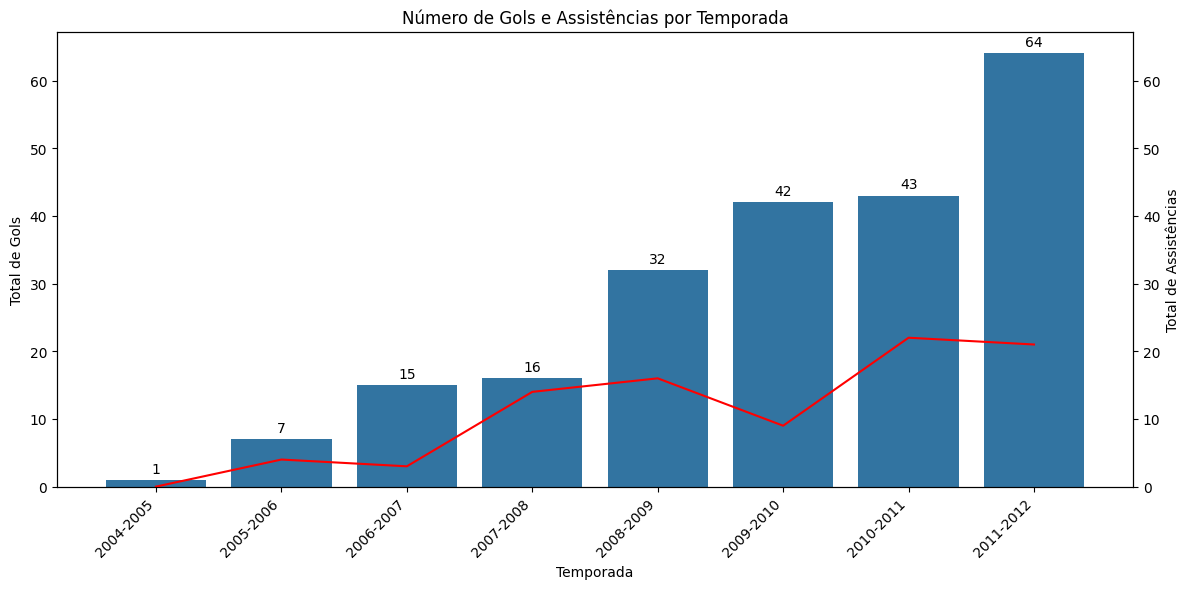

In [43]:
# Filtrar as oito primeiras temporadas
df_oito_temporadas = df[df['Season'] <= '2011-2012']

# Agrupar por temporada e somar os gols e assistências
gols_assistencias_temporada = df_oito_temporadas.groupby('Season').agg({'Gls': 'sum', 'Ast': 'sum'}).reset_index()

# Criar o gráfico de barras para os gols
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Season', y='Gls', data=gols_assistencias_temporada)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Gols')
plt.xlabel('Temporada')
plt.title('Número de Gols e Assistências por Temporada')

# Adicionar a linha para as assistências
ax2 = plt.twinx()
sns.lineplot(x='Season', y='Ast', data=gols_assistencias_temporada, color='red', ax=ax2)
ax2.set_ylabel('Total de Assistências')

# Ajustar os limites dos eixos para que ambos estejam proporcionais
ax2.set_ylim(0, ax.get_ylim()[1])  # Definir o limite superior de assistências igual ao dos gols

# Adicionando o número total de gols sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),  # Deslocamento do texto acima da barra
                textcoords='offset points')

plt.tight_layout()
plt.show()


A título de comparação, também fiz um gráfico desses comparando o número de jogos e com a linha traçando o número de jogos onde ele começou. Ele não só começava mais jogos como dificilmente era poupado.

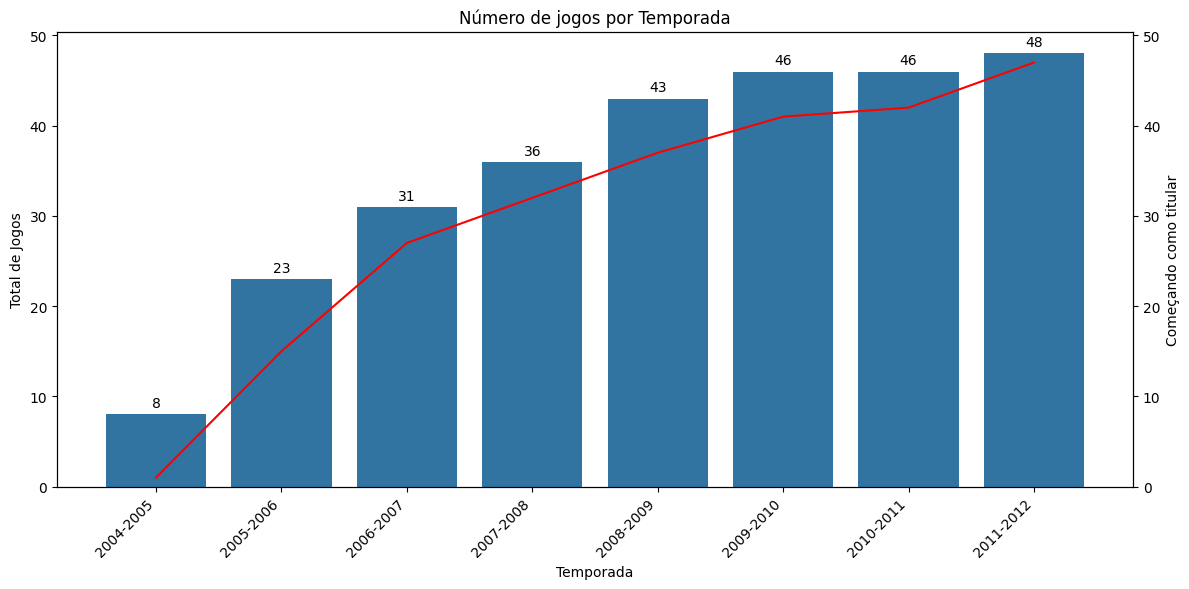

In [44]:
# Filtrar as oito primeiras temporadas
df_oito_temporadas = df[df['Season'] <= '2011-2012']

# Agrupar por temporada e somar os gols e assistências
jogos_temporada = df_oito_temporadas.groupby('Season').agg({'MP': 'sum', 'Starts': 'sum'}).reset_index()

# Criar o gráfico de barras para os gols
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Season', y='MP', data=jogos_temporada)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Jogos')
plt.xlabel('Temporada')
plt.title('Número de jogos por Temporada')

# Adicionar a linha para as assistências
ax2 = plt.twinx()
sns.lineplot(x='Season', y='Starts', data=jogos_temporada, color='red', ax=ax2)
ax2.set_ylabel('Começando como titular')

# Ajustar os limites dos eixos para que ambos estejam proporcionais
ax2.set_ylim(0, ax.get_ylim()[1])  # Definir o limite superior de assistências igual ao dos gols

# Adicionando o número total de gols sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),  # Deslocamento do texto acima da barra
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Insight

Messi já era muito bom, mas a partir de 2008 ele se torna algo extra-terreno. Diversos fatores contribuiram para isso: a maturidade do próprio jogador, o entendimento do clube de lhe entregar oficialmente o protagonismo, a ausência das lesões e a perfeita sinergia com o novo comandante Pep Guardiola.

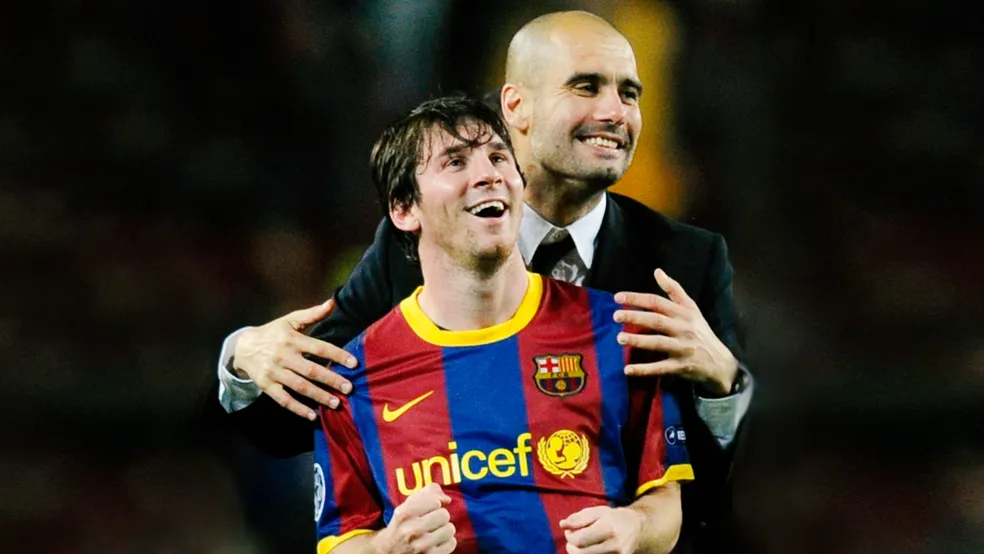

E não só o desempenho individual, isso também se traduziu em títulos como três em La Liga e duas da UEFA Champions League. Artilharias, recordes, números, idolatria e prêmios individuiais. Definitivamente foi o momento em que Lionel Messi entrou no panteão dos grandes da história do futebol.